CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


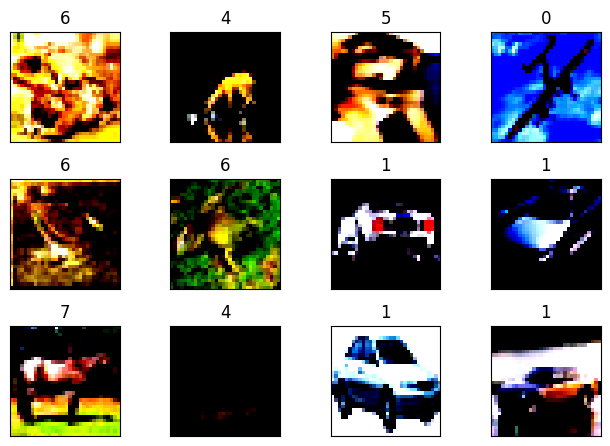

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)
# Train data transformations

train_transforms = transforms.Compose([
    # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # transforms.Resize((28, 28)),
    # transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

train_data = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=test_transforms)
class_map = {
    'ZERO': 0,
    'ONE': 1,
    'TWO': 2,
    'THREE': 3,
    'FOUR': 4,
    'FIVE': 5,
    'SIX': 6,
    'SEVEN': 7,
    'EIGHT': 8,
    'NINE': 9
}
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [3]:
!pip install torchsummary
from model import Net_BN,train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net_BN().to(device)
model_summary(model, (3,32,32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 20, 28, 28]           2,880
              ReLU-6           [-1, 20, 28, 28]               0
       BatchNorm2d-7           [-1, 20, 28, 28]              40
           Dropout-8           [-1, 20, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             320
        MaxPool2d-10           [-1, 16, 14, 14]               0
           Conv2d-11           [-1, 20, 14, 14]           2,880
             ReLU-12           [-1, 20, 14, 14]               0
    

In [4]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=7)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=15, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion,scheduler)
  test(model, device, test_loader)
  # scheduler.step(tl)

Loss=1.8642473220825195 Batch_id=97 Accuracy=22.34: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 1.7897, Accuracy: 3354/10000 (33.54%)



Loss=1.3831034898757935 Batch_id=97 Accuracy=40.85: 100%|██████████| 98/98 [00:15<00:00,  6.52it/s]



Test set: Average loss: 1.4811, Accuracy: 4542/10000 (45.42%)



Loss=1.0925203561782837 Batch_id=97 Accuracy=52.78: 100%|██████████| 98/98 [00:14<00:00,  6.55it/s]



Test set: Average loss: 1.2314, Accuracy: 5537/10000 (55.37%)



Loss=1.0330818891525269 Batch_id=97 Accuracy=60.00: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]



Test set: Average loss: 1.1041, Accuracy: 6062/10000 (60.62%)



Loss=0.9823808073997498 Batch_id=97 Accuracy=64.58: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]



Test set: Average loss: 1.0674, Accuracy: 6286/10000 (62.86%)



Loss=0.989221453666687 Batch_id=97 Accuracy=67.74: 100%|██████████| 98/98 [00:16<00:00,  6.04it/s]



Test set: Average loss: 0.9644, Accuracy: 6521/10000 (65.21%)



Loss=0.8339323997497559 Batch_id=97 Accuracy=70.12: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]



Test set: Average loss: 0.8882, Accuracy: 6841/10000 (68.41%)



Loss=0.8741335868835449 Batch_id=97 Accuracy=72.10: 100%|██████████| 98/98 [00:15<00:00,  6.51it/s]



Test set: Average loss: 0.9354, Accuracy: 6749/10000 (67.49%)



Loss=0.6564844846725464 Batch_id=97 Accuracy=73.79: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]



Test set: Average loss: 0.9540, Accuracy: 6832/10000 (68.32%)



Loss=0.819617509841919 Batch_id=97 Accuracy=75.27: 100%|██████████| 98/98 [00:15<00:00,  6.47it/s]



Test set: Average loss: 0.7649, Accuracy: 7356/10000 (73.56%)



Loss=0.627569317817688 Batch_id=97 Accuracy=76.22: 100%|██████████| 98/98 [00:15<00:00,  6.40it/s]



Test set: Average loss: 0.7515, Accuracy: 7391/10000 (73.91%)



Loss=0.6873070597648621 Batch_id=97 Accuracy=77.54: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]



Test set: Average loss: 0.7164, Accuracy: 7518/10000 (75.18%)



Loss=0.5605113506317139 Batch_id=97 Accuracy=78.89: 100%|██████████| 98/98 [00:16<00:00,  6.10it/s]



Test set: Average loss: 0.7004, Accuracy: 7568/10000 (75.68%)



Loss=0.5336366295814514 Batch_id=97 Accuracy=79.76: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]



Test set: Average loss: 0.6899, Accuracy: 7577/10000 (75.77%)



Loss=0.5233331322669983 Batch_id=97 Accuracy=80.49: 100%|██████████| 98/98 [00:15<00:00,  6.40it/s]



Test set: Average loss: 0.6877, Accuracy: 7577/10000 (75.77%)



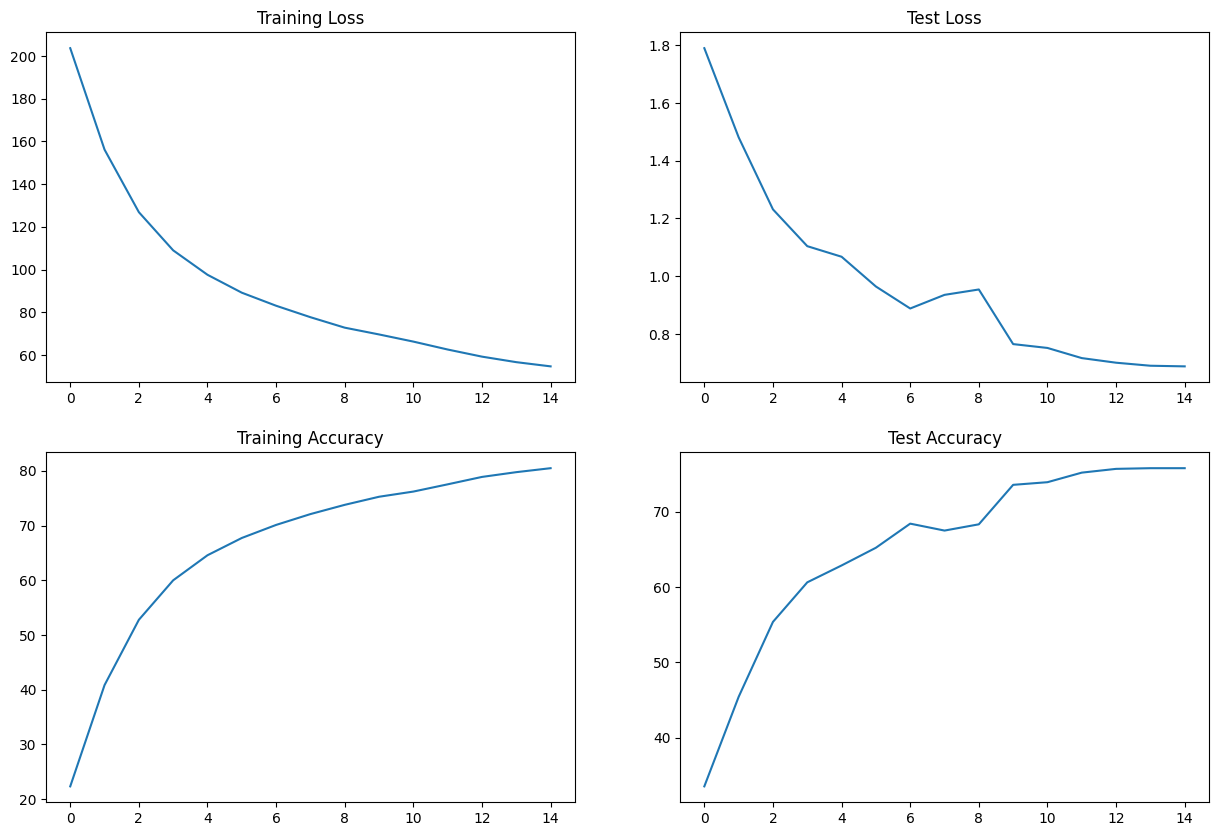

In [5]:
from model import draw_graphs
draw_graphs()

In [9]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions

Total Incorrect Predictions 2423


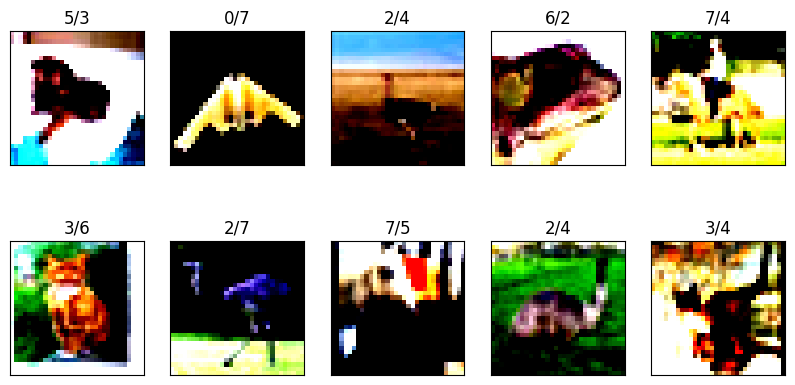

In [10]:
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)